In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



import datetime as dt
import warnings

from typing import Optional

warnings.filterwarnings("ignore")

DATA_DIR = "../data/"
CSV_DATA = "sample30.csv"

# custom_date_parser = lambda x: dt.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%f%Z")

# def parse_date_string(date_string: str) -> Optional[dt.datetime]:
#     if not pd.isna(date_string):
#         try:
#             return dt.datetime.strptime(date_string, '%Y-%m-%dT%H:%M:%S.%f%Z')
#         except ValueError:
#             return dt.datetime.strptime(date_string, '%Y-%m-%dT%H:%M:%S%Z')
#     return None


reviews = pd.read_csv(DATA_DIR+CSV_DATA)
print(reviews.shape)
reviews.head(2)

(30000, 15)


,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive


In [68]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [69]:
def missingValues(df, thresh=0):
    df_nas_percent = (
            ((df.isna().sum()/df.shape[0])*100)
            .reset_index()
            .rename(columns={"index": "column", 0: "nulls_percent"})
            .sort_values(by="nulls_percent", ascending=False)
    )
    return df_nas_percent.loc[df_nas_percent["nulls_percent"] > thresh]


In [70]:
missingValues(reviews)

,column,nulls_percent
12,reviews_userProvince,99.433333
11,reviews_userCity,93.570000
6,reviews_didPurchase,46.893333
7,reviews_doRecommend,8.566667
10,reviews_title,0.633333
3,manufacturer,0.470000
13,reviews_username,0.210000
5,reviews_date,0.153333
14,user_sentiment,0.003333


In [71]:
reviews_na_handled = reviews.loc[~reviews.user_sentiment.isna()]
reviews_na_handled.shape

(29999, 15)

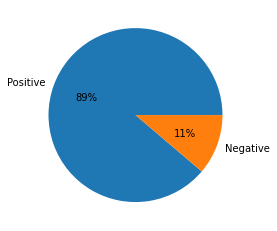

In [93]:
# sns_colors = sns.color_palette("Spectral")

user_senti_counts = reviews_na_handled['user_sentiment'].value_counts()

plt.pie(user_senti_counts, labels=user_senti_counts.index.tolist(), autopct='%.0f%%')
plt.show()
# user_senti_counts

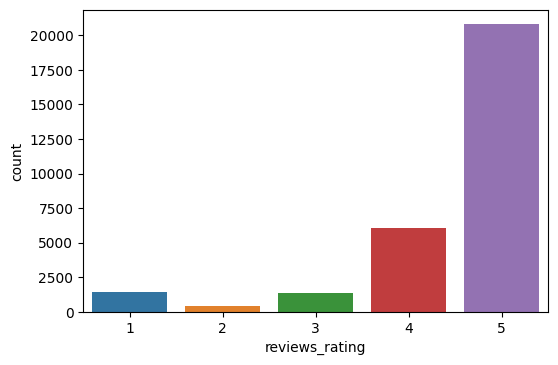

In [141]:
plt.figure(dpi=100)
_ = sns.countplot(x=reviews_na_handled['reviews_rating'])
plt.show()

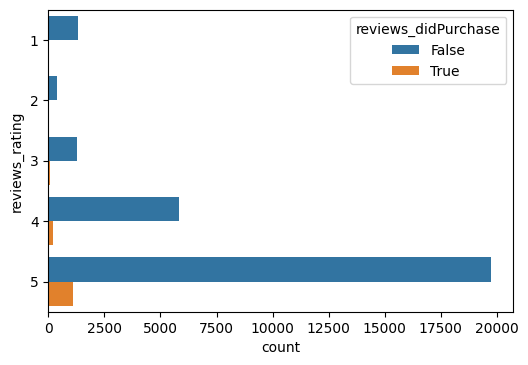

In [151]:
plt.figure(dpi=100)
sns.countplot(y=reviews_na_handled['reviews_rating'], hue=reviews_na_handled["reviews_didPurchase"].fillna(False))
plt.show()

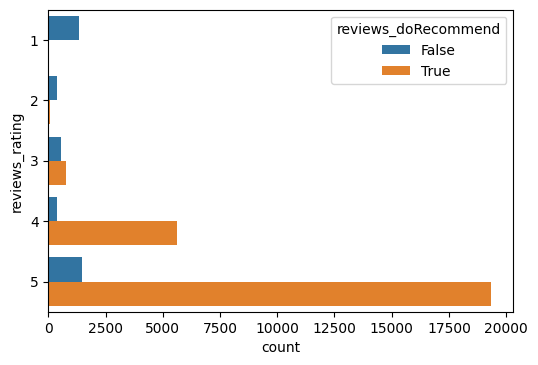

In [152]:
plt.figure(dpi=100)
sns.countplot(y=reviews_na_handled['reviews_rating'], hue=reviews_na_handled["reviews_doRecommend"].fillna(False))
plt.show()

In [178]:
purchased_reviews = reviews_na_handled.loc[reviews_na_handled['reviews_didPurchase']==True]
purchased_reviews_by_brand_sentiment = purchased_reviews[['brand', 'user_sentiment']].value_counts().reset_index().rename(columns={0:"total"})
positive_brands = purchased_reviews_by_brand_sentiment[purchased_reviews_by_brand_sentiment['user_sentiment']=='Positive'].sort_values(by="total", ascending=False)
negative_brands = purchased_reviews_by_brand_sentiment[purchased_reviews_by_brand_sentiment['user_sentiment']=='Negative'].sort_values(by="total", ascending=False)
N = 5

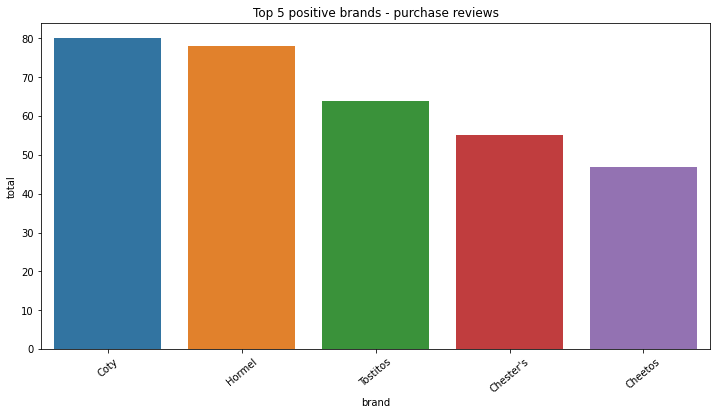

In [182]:
plt.figure(figsize=(12, 6))
plt.title(f"Top {N} positive brands - purchase reviews")
sns.barplot(data=positive_brands[:N], x='brand', y='total')
plt.xticks(rotation=40)
plt.show()

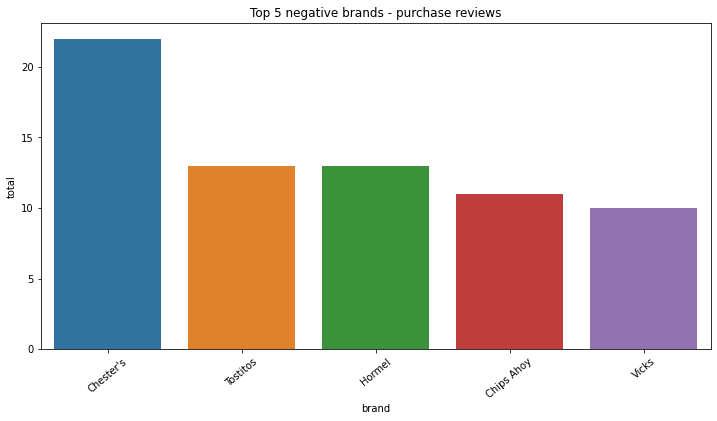

In [181]:
plt.figure(figsize=(12, 6))
plt.title(f"Top {N} negative brands - purchase reviews")
sns.barplot(data=negative_brands[:N], x='brand', y='total')
plt.xticks(rotation=40)
plt.show()

In [197]:
recommended_reviews_without_purchase = reviews_na_handled.loc[(reviews_na_handled['reviews_didPurchase']==False) & (reviews_na_handled['reviews_doRecommend']==True)]
recommend_rwp_brand_sentiment = recommended_reviews_without_purchase[['brand', 'user_sentiment']].value_counts().reset_index().rename(columns={0:"total"})
recommend_rwp_positive = recommend_rwp_brand_sentiment[recommend_rwp_brand_sentiment['user_sentiment']=='Positive'].sort_values(by="total", ascending=False)

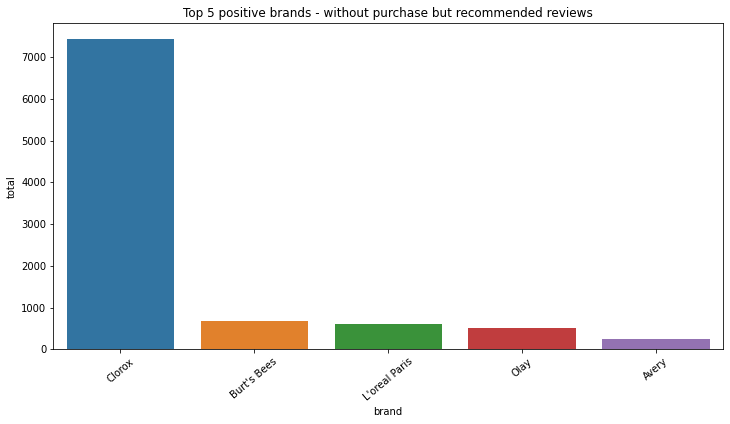

In [198]:
plt.figure(figsize=(12, 6))
plt.title(f"Top {N} positive brands - without purchase but recommended reviews")
sns.barplot(data=recommend_rwp_positive[:N], x='brand', y='total')
plt.xticks(rotation=40)
plt.show()

In [114]:
reviews.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [199]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

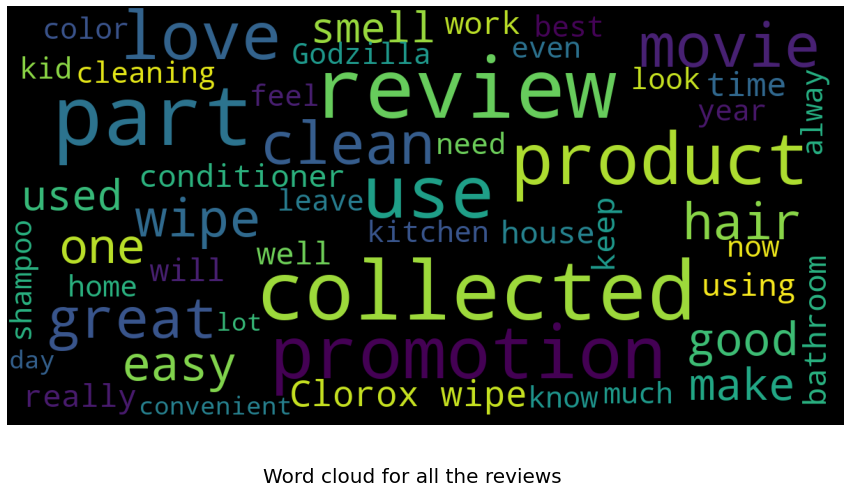

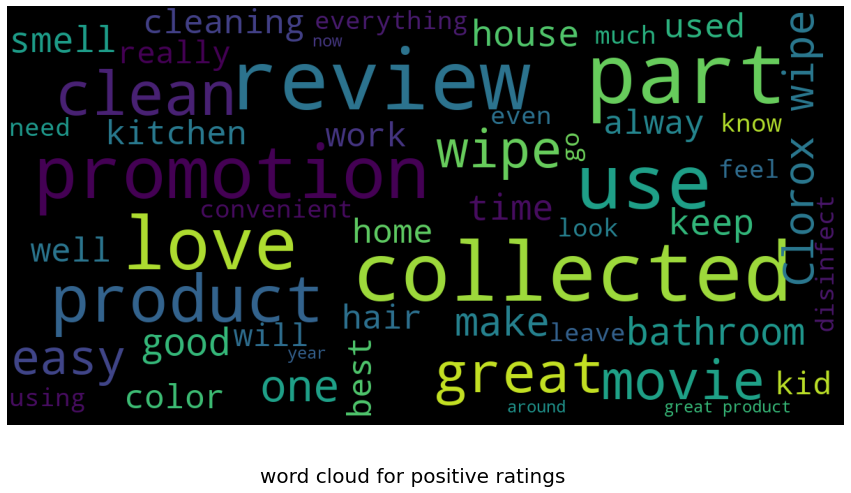

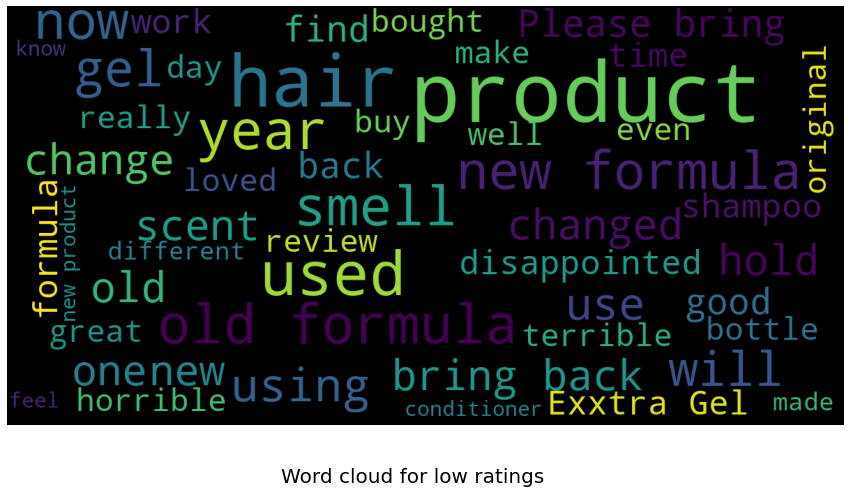

In [250]:
def generate_wc(data, title=None, words=30):
    if len(data) < 1:
        print("No words to generate word cloud")
        return
    if type(data) is pd.Series:
        data = "\n".join(list(data.values))
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=words,
        max_font_size=40, 
        scale=3,
        random_state=123,
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

generate_wc(reviews_na_handled['reviews_text'], title="Word cloud for all the reviews", words=50)
generate_wc(reviews_na_handled[reviews_na_handled['reviews_rating']>4]['reviews_text'], title="word cloud for positive ratings", words=50)
generate_wc(reviews_na_handled.loc[reviews_na_handled['reviews_rating']<2]['reviews_text'], title="Word cloud for low ratings", words=50)